Reading notes and partial solutions to [Data Structures and Algorithms in Python](https://blackwells.co.uk/bookshop/product/9781118290279?gC=f177369a3b&gclid=Cj0KCQjwhJrqBRDZARIsALhp1WTBIyoxeQGXedlVy80vsglvFbNkVf7jTP0Z0zXEIP87lfqbtb4_diYaAr8dEALw_wcB).

In [1]:
import random
from matplotlib import pyplot as plt
import math
from datetime import datetime

# Python Primer

## Generators

In [2]:
# Traditional way
def factors(n):
    '''Return the factors of n as a list.'''
    results = []
    for k in range(1, n+1):
        if n % k == 0:
            results.append(k)
    return results

def test():
    assert factors(1) == [1]
    assert factors(4) == [1, 2, 4]
    assert factors(10) == [1, 2, 5, 10]
    return True

test()

True

In [3]:
# Using generator
def factors(n):
    '''Return the factors of n as a list.'''
    for k in range(1, n+1):
        if n % k == 0:
            yield k

def test():
    assert list(factors(1)) == [1]
    assert list(factors(4)) == [1, 2, 4]
    assert list(factors(10)) == [1, 2, 5, 10]
    return True

test()

True

In [4]:
factors(10)

<generator object factors at 0x0000020218C47930>

In [5]:
for i in factors(10):
    print(i)

1
2
5
10


In [6]:
def factors(n): # generator that computes factors
    '''Return the factors of n as a list.'''
    k = 1
    while k * k < n: # while k < sqrt(n)
        if n % k == 0:
            yield k # k is a factor of n
            yield n // k # so is n // k
            # this step improves efficiency because we get two factors at one comparison
        k += 1
    if k * k == n: # special case if n is perfect square
        yield k # k is a factor, but the "complementing factor" is also k

def test():
    # the resulting factors are not in increasing order but in complementing pairs instead,
    # so we need to use the unordered set() to test for equality
    assert set(factors(1)) == {1}
    assert set(factors(4)) == {1, 2, 4}
    assert set(factors(10)) == {1, 2, 5, 10}
    return True

test()

True

In [7]:
factors(10)

<generator object factors at 0x0000020218CF54F8>

In [8]:
for i in factors(10):
    print(i)

1
10
2
5


## Exercises

### Reinforcement

**R-1.1** Write a short Python function, `is_multiple(n, m)`, that takes two integer
values and returns `True` if `n` is a multiple of `m`, that is, `n = mi` for some
integer `i`, and `False` otherwise.

In [9]:
def is_multiple(n, m):
    return n % m == 0

def random_exp():
    m = random.randint(-1000000, 1000000)
    n = m * random.randint(-1000000, 1000000)
    return n, m

def random_counter_exp():
    m = random.randint(-1000000, 1000000) 
    while m == 1:
        m = random.randint(-1000000, 1000000) # there exists not counter example if m = 1
    n = m * random.randint(-1000000, 1000000) + m // 2
    return n, m

def test():
    for counter in range(50):
        exp = random_exp()
        assert is_multiple(exp[0], exp[1])
        counterExp = random_counter_exp()
        assert not is_multiple(counterExp[0], counterExp[1])
    return True

test()

True

**R-1.2** Write a short Python function, is_even(k), that takes an integer value and
returns True if k is even, and False otherwise. However, your function
cannot use the multiplication, modulo, or division operators.

In [10]:
def is_even(k):
    lastDigit = str(k)[-1]
    return lastDigit in ('0', '2', '4', '6', '8')

def random_exp():
    m = random.randint(-1000000, 1000000)
    return 2 * m

def random_counter_exp():
    m = random.randint(-1000000, 1000000)
    return 2 * m + 1

def test():
    for counter in range(50):
        assert is_even(random_exp())
        assert not is_even(random_counter_exp())
    return True

test()

True

**R-1.3** Write a short Python function, `minmax(data)`, that takes a sequence of
one or more numbers, and returns the smallest and largest numbers, in the
form of a tuple of length two. Do not use the built-in functions `min` or
`max` in implementing your solution.

In [11]:
def minmax(data):
    if len(data) != 0:
        curMin = data[0]
        curMax = data[0]
        for x in data:
            if x < curMin:
                curMin = x
            elif x > curMax:
                curMax = x
        return curMin, curMax

def random_list():
    n = random.randint(1, 100)
    result = [0] * n
    for i in range(n):
        result[i] = random.randint(-1000000, 1000000)
    return result

def test():
    for counter in range(50):
        data = random_list()
        assert minmax(data) == (min(data), max(data))
    return True

test()

True

**R-1.4** Write a short Python function that takes a positive integer `n` and returns
the sum of the squares of all the positive integers smaller than `n`.

In [12]:
def sum_squares(n):
    if n < 0:
        raise ValueError("Input must be positive.")
    result = 0
    for i in range(n):
        result += i ** 2
    return result

def test():
    assert sum_squares(4) == 1 + 4 + 9
    assert sum_squares(0) == 0
    try:
        sum_squares(-5)
    except ValueError as e:
        print('Caught error: ' + str(e))
    return True

test()

Caught error: Input must be positive.


True

**R-1.5** Give a single command that computes the sum from Exercise R-1.4, relying
on Python’s comprehension syntax and the built-in `sum` function.

In [13]:
def sum_squares2(n):
    if n < 0:
        raise ValueError("Input must be positive.")
    return sum([i ** 2 for i in range(n)])

def test():
    for counter in range(50):
        num = random.randint(1, 100)
        assert sum_squares(num) == sum_squares2(num)
    return True

test()

True

**R-1.6** Write a short Python function that takes a positive integer `n` and returns
the sum of the squares of all the odd positive integers smaller than `n`.

In [14]:
def sum_squares_odd(n):
    if n < 0:
        raise ValueError("Input must be positive.")
    result = 0
    for i in range(n):
        if not is_even(i):
            result += i ** 2
    return result

def test():
    assert sum_squares_odd(4) == 1 + 9
    assert sum_squares_odd(0) == 0
    return True

test()

True

**R-1.7** Give a single command that computes the sum from Exercise R-1.6, relying
on Python’s comprehension syntax and the built-in `sum` function.

In [15]:
def sum_squares_odd2(n):
    if n < 0:
        raise ValueError("Input must be positive.")
    return sum([i ** 2 if not is_even(i) else 0 for i in range(n)])

def test():
    for counter in range(50):
        num = random.randint(1, 100)
        assert sum_squares_odd(num) == sum_squares_odd2(num)
    return True

test()

True

**R-1.8** Python allows negative integers to be used as indices into a sequence,
such as a string. If string `s` has length `n`, and expression `s[k]` is used for index
$-n\leq k < 0$, what is the equivalent index $j \geq 0$ such that `s[j]` references
the same element?

In [16]:
def equiv_index(n, k):
    return n + k

def random_char():
    num = random.randint(97, 122)
    return chr(num)

def random_string(n):
    return ''.join([random_char() for i in range(n)])

def test():
    for counter in range(50):
        num = random.randint(0, 100)
        s = random_string(num)
        for i in range(1, num + 1):
            k = -i
            assert s[k] == s[equiv_index(num, k)]
    return True

test()

True

**R-1.9** What parameters should be sent to the `range` constructor, to produce a
range with values `50, 60, 70, 80`?

In [17]:
for i in range(50, 90, 10):
    print(i)

50
60
70
80


**R-1.10** What parameters should be sent to the `range` constructor, to produce a
range with values `8, 6, 4, 2, 0, −2, −4, −6, −8`?

In [18]:
for i in range(8, -10, -2):
    print(i)

8
6
4
2
0
-2
-4
-6
-8


**R-1.11** Demonstrate how to use Python’s list comprehension syntax to produce
the list `[1, 2, 4, 8, 16, 32, 64, 128, 256]`.

In [19]:
print([2 ** i for i in range(1, 9)])

[2, 4, 8, 16, 32, 64, 128, 256]


**R-1.12** Python’s `random` module includes a function `choice(data)` that returns a
random element from a non-empty sequence. The random module includes
a more basic function `randrange`, with parameterization similar to
the built-in `range` function, that return a random choice from the given
range. Using only the `randrange` function, implement your own version
of the `choice `function.

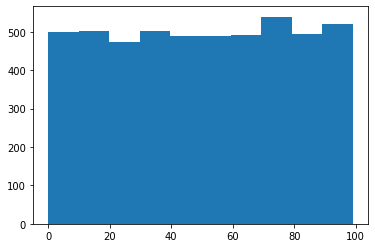

In [20]:
def choice(data):
    index = random.randrange(0, len(data))
    return data[index]

def test():
    data = [choice([i for i in range(100)]) for j in range(5000)]
    plt.hist(data)

test()

### Creativity

**C-1.13** Write a pseudo-code description of a function that reverses a list of n
integers, so that the numbers are listed in the opposite order than they
were before, and compare this method to an equivalent Python function
for doing the same thing.

In [21]:
def rev(seq):
    n = len(seq)
    res = [0] * n
    for i in range(n):
        res[i] = seq[n-i-1]
    return res

def test():
    for counter in range(50):
        seq = random_list()
        assert rev(seq) == list(reversed(seq))
    return True

test()

True

**C-1.14** Write a short Python function that takes a sequence of integer values and
determines if there is a distinct pair of numbers in the sequence whose
product is odd.

In [22]:
def odd_product(seq):
    seq = filter(lambda x: not is_even(x), seq) # filter out even numbers
    seq = list(set(seq)) # remove duplicates
    return len(seq) > 1

def test():
    assert odd_product([1, 3, 5, 2])
    assert not odd_product([4, 2, 10, 26])
    return True

test()

True

**C-1.15** Write a Python function that takes a sequence of numbers and determines
if all the numbers are different from each other (that is, they are distinct).

In [23]:
def distinct(seq):
    d = {} # dictionary with key as counter
    for x in seq:
        if x in d:
            return False
        else:
            d[x] = 1
    return True

def test():
    assert distinct([i for i in range(10)])
    assert not distinct([1, 2, 7, 4, 1])
    return True

test()

True

**C-1.16** In our implementation of the `scale` function (page 25), the body of the loop
executes the command `data[j] = factor`. We have discussed that numeric
types are immutable, and that use of the = operator in this context causes
the creation of a new instance (not the mutation of an existing instance).
How is it still possible, then, that our implementation of scale changes the
actual parameter sent by the caller?

The list, data, is referential and mutable.

**C-1.17** Had we implemented the `scale` function (page 25) as follows, does it work
properly?

```python
def scale(data, factor):
    for val in data:
        val *= factor
```


No. The list `data` does not change as the alias `val` for each element in the list is re-assigned to another value. 

**C-1.18** Demonstrate how to use Python’s list comprehension syntax to produce
the list `[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]`.

In [24]:
print([x * (x + 1) for x in range(10)])

[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]


**C-1.19** Demonstrate how to use Python’s list comprehension syntax to produce
the list `[ a , b , c , ..., z ]`, but without having to type all 26 such
characters literally.

In [25]:
print([chr(i) for i in range(97, 123)])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


**C-1.20** Python’s `random` module includes a function `shuffle(data)` that accepts a
list of elements and randomly reorders the elements so that each possible
order occurs with equal probability. The random module includes a
more basic function `randint(a, b)` that returns a uniformly random integer
from `a` to `b` (including both endpoints). Using only the `randint` function,
implement your own version of the `shuffle` function.

In [26]:
def shuffle(data):
    n = len(data)
    res = [None] * n # reshuffled list
    taken = [None] * n # list of new indexes taken
    for i in range(n):
        newIndex = random.randint(0, n-1)
        while newIndex in taken: # if the generated index is already taken, pick randomly again
            newIndex = random.randint(0, n-1)
        taken[i] = newIndex
        res[newIndex] = data[i]
    return res

def test():
    for counter in range(50):
        data = random_list()
        assert set(data) == set(shuffle(data))
    return True

test()

True

**C-1.21** Write a Python program that repeatedly reads lines from standard input
until an `EOFError` is raised, and then outputs those lines in reverse order
(a user can indicate end of input by typing `ctrl-D`).

In [27]:
def reader():
    lines = [] # stack would be better
    while True:
        try:
            lines.append(input("Enter: "))
        except EOFError:
            break
    n = len(lines)
    for i in range(n):
        print(lines[n-i-1])

# or
# def reader():
#     lines = []
#     try:
#         while True:
#             lines.append(input("Enter: "))
#     except EOFError:
#         n = len(lines)
#         for i in range(n):
#             print(lines[n-i-1])

# reader() # try in command line

**C-1.23** Give an example of a Python code fragment that attempts to write an element
to a list based on an index that may be out of bounds. If that index
is out of bounds, the program should catch the exception that results, and
print the following error message: Don’t try buffer overflow attacks in Python!

In [28]:
data = [1,2,3]
try:
    data[3] = 4
except IndexError:
    print("Don’t try buffer overflow attacks in Python!")

Don’t try buffer overflow attacks in Python!


**C-1.24** Write a short Python function that counts the number of vowels in a given
character string.

In [29]:
def count_vowels(s):
    counter = 0
    for char in s:
        if char in ['a', 'e', 'i', 'o', 'u']:
            counter += 1
    return counter

def test():
    assert count_vowels('aerawfsdasdawae') == 7
    assert count_vowels('') == 0
    return True

test()

True

**C-1.25** Write a short Python function that takes a string *s*, representing a sentence,
and returns a copy of the string with all punctuation removed. For example,
if given the string "Let's try, Mike.", this function would return
"Lets try Mike".

In [30]:
def remove_punctuation(s):
    res = ''
    for char in s:
        if char not in [',', '.', ';', ':', '?', '!', '\'', '"']:
            res += char
    return res

def test():
    assert remove_punctuation("Let's try, Mike") == "Lets try Mike"
    assert remove_punctuation("She said: \"Let's try, Mike\"") == "She said Lets try Mike"
    return True

test()

True

**C-1.26** Write a short program that takes as input three integers, `a`, `b`, and `c`, from
the console and determines if they can be used in a correct arithmetic
formula (in the given order), like $a+b = c$, $a = b−c$, or $a ∗ b = c$.

In [31]:
def formula(a, b, c):
    return (a + b == c) or (a - b == c) or (a * b == c) or (a == b + c) or (a == b - c) or (a == b * c)

def test():
    assert formula(1, 2, 3)
    assert formula(10, 2, 5)
    assert not formula(2, 3, 4)
    return True

test()

True

**C-1.27** In Section 1.8, we provided three different implementations of a generator
that computes factors of a given integer. The third of those implementations,
from page 41, was the most efficient, but we noted that it did not
yield the factors in increasing order. Modify the generator so that it reports
factors in increasing order, while maintaining its general performance advantages.

In [32]:
def factors(n):
    '''Return the factors of n in a list in increasing order.'''
    k = 1
    temp = [] # temporarily store the large n // k values that violate the increasing order
    # yield k only when k < n // k, and yield n // k separately at the end
    while k * k < n: # moments where k < n // k
        if n % k == 0:
            yield k
            temp.append(n // k) # because k is incrementing, n // k is stored in decreasing order
        k += 1
    if k * k == n: # moment where k == n // k
        yield k
    for i in reversed(temp): # yield the stored values at the end
        yield i

def test():
    assert list(factors(1)) == [1]
    assert list(factors(4)) == [1, 2, 4]
    assert list(factors(10)) == [1, 2, 5, 10]
    return True

test()

True

**C-1.28** The p-norm of a vector $v = (v_1,v_2, \ldots ,v_n)$ in $n$-dimensional space is defined
as 
$$||v|| = \sqrt{v_1^p + v_2^p + \ldots + v_n^p}$$
For the special case of $p = 2$, this results in the traditional Euclidean
norm, which represents the length of the vector. For example, the Euclidean
norm of a two-dimensional vector with coordinates $(4,3)$ has a
Euclidean norm of
$\sqrt{4^2 + 3^2} = 5$
Give an implementation of a function named `norm` such that `norm(v, p)` returns the `p`-norm
value of `v` and `norm(v)` returns the Euclidean norm of `v`. You may assume
that `v` is a list of numbers.

In [33]:
def norm(v, p = 2):
    return (sum([x ** p for x in v])) ** (1/p)

def test():
    assert norm([4, 3], 2) == 5.
    assert norm([8, 6], 2) == 10.
    return True

test()

True

### Projects

**P-1.29** Write a Python program that outputs all possible strings formed by using
the characters `c`, `a`, `t`, `d`, `o`, and `g` exactly once.

In [34]:
CHARS = 'catdog'

def permute_chars(chars):
    charList = [char for char in chars]
    n = len(charList)
    indexPerms = permute(list(range(n)))
    return [[chars[i] for i in indexPerm] for indexPerm in indexPerms]

def permute(seq):
    '''Return a list of all permutations of seq.'''
    n = len(seq)
    if n == 0:
        return []
    elif n == 1:
        return [seq]
    else:
        permutations = []
        # append each element to the permutations of the remaining elements
        for i in range(n):
            fixed = seq[i] # fix the element at index i
            seq1 = swap(seq, i, 0) # and swap it to the front
            remainingSeqIndex = list(filter(lambda j: j != i, list(range(n)))) # indices of the remaining elements
            remainingSeq = [seq[j] for j in remainingSeqIndex] # the remaining sequence without the element at index i
            remainingSeqPermute = permute(remainingSeq) # recursively generate permutations of the remaining sequence
            for s in remainingSeqPermute: # append the fixed element to these permutations
                s.insert(0, fixed) # not that this operation does not return anything
            seqPermute = remainingSeqPermute
            permutations += seqPermute
        return permutations

def swap(seq, i1, i2):
    '''Return a copy of seq with elements at indices i1 and i2 swapped.'''
    seq1 = [x for x in seq]
    temp = seq1[i1]
    seq1[i1] = seq1[i2]
    seq1[i2] = temp
    return seq1

def factorial(n):
    '''Return n! for any positive integer n.'''
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)

def unique(seq):
    '''Return True of sequence contains no duplicates. Compatible with unhashable types, e.g., list of lists, which
    cannot be passed to set() to remove duplicates.'''
    return len(list(set(tuple(x) for x in seq))) == len(seq)

def test():
    perms = permute_chars(CHARS)
    # check that the number of permutations is n! and that the permutations are unique
    assert len(perms) == factorial(len(CHARS)) and unique(perms)
    for counter in range(50):
        num = random.randint(1, 5)
        string = random_string(num)
        while not unique(string):
            string = random_string(num)
        perms = permute_chars(string)
        assert len(perms) == factorial(num) and unique(perms)
    return True

test()

True

**P-1.30** Write a Python program that can take a positive integer greater than 2 as
input and write out the number of times one must repeatedly divide this
number by 2 before getting a value less than 2.

In [35]:
def halving_times(n):
    if type(n) is not int:
        raise ValueError("Input must be integer.")
    if n < 2:
        return 0
    elif n == 2:
        return 1
    else:
        return 1 + halving_times(n//2)

def test():
    assert halving_times(4) == 2
    assert halving_times(9) == 3
    for counter in range(50):
        num = random.randint(0, 100)
        for i in range(halving_times(num)):
            num = num // 2
        assert num < 2
    return True

test()

True

**P-1.31** Write a Python program that can "make change." Your program should
take two numbers as input, one that is a monetary amount charged and the
other that is a monetary amount given. It should then return the number
of each kind of bill and coin to give back as change for the difference
between the amount given and the amount charged. The values assigned
to the bills and coins can be based on the monetary system of any current
or former government. Try to design your program so that it returns as
few bills and coins as possible.

In [36]:
BILLS = [1, 2, 5, 10, 20, 50, 100]

def helper(charged, given, changes):
    '''Return the bills included in the changes as a bill:number dictionary recursively.'''
    if given < charged:
        raise ValueError("Insufficient amount given.")
    diff = given - charged
    for bill in reversed(BILLS):
        if bill <= diff:
            changes[bill] += 1
            if bill < diff:
                return helper(charged, given - bill, changes) # recursively find changes
            else:
                return changes
        else:
            continue
    return changes

def make_change(charged, given):
    initialDict = {bill:0 for bill in BILLS} # initialize dictionary
    changes = helper(charged, given, initialDict)
    return changes

def test():
    for counter in range(50):
        charged = random.randint(0, 100)
        given = random.randint(0, 500)
        while given < charged:
            given = random.randint(0, 500) # given must be no less than charged
        charges = make_change(charged, given)
        paid = 0
        for k, v in charges.items():
            paid += k * v
        assert paid == given - charged
    return True

test()

True

**P-1.32** Write a Python program that can simulate a simple calculator, using the
console as the exclusive input and output device. That is, each input to the
calculator, be it a number, like `12.34` or `1034`, or an operator, like `+` or `=`,
can be done on a separate line. After each such input, you should output
to the Python console what would be displayed on your calculator.

In [37]:
def simple_calculator(): # does not handle parentheses
    num1 = to_numeric(input())
    op = input()
    num2 = to_numeric(input())
    if op == '+':
        print('= ' + str(num1 + num2))
    elif op == '-':
        print('= ' + str(num1 - num2))
    elif op == '*':
        print('= ' + str(num1 * num2))
    else:
        print('= ' + str(num1 / num2))

def to_numeric(num):
    if '.' in num:
        return float(num)
    else:
        return int(num)

simple_calculator()

100
/
3
= 33.333333333333336


**P-1.33** Write a Python program that simulates a handheld calculator. Your program
should process input from the Python console representing buttons
that are "pushed," and then output the contents of the screen after each operation
is performed. Minimally, your calculator should be able to process
the basic arithmetic operations and a reset/clear operation.

In [38]:
# Without using other modules?

**P-1.34** A common punishment for school children is to write out a sentence multiple
times. Write a Python stand-alone program that will write out the
following sentence one hundred times: "I will never spam my friends
again." Your program should number each of the sentences and it should
make eight different random-looking typos.

In [39]:
SENTENCE = 'I will never spam my friends again.'

def writer():
    n = len(SENTENCE)
    randomSentNums = random.sample(range(0, 100), 8) # indices of sentences to contain typo
    print(randomSentNums)
    randomIndices = [] # indices of characters to be typos in 8 of the sentences
    for i in range(100):
        if i in randomSentNums:
            sentence = SENTENCE
            sentenceList = [char for char in SENTENCE]
            index = random.randint(0, n-1)
            while index in randomIndices:
                index = random.randint(0, n-1) # typos should be different
            typo = random_char()
            while typo == sentence[index]: # typo should differ from original character in the sentence
                typo = random_char()
            sentenceList[index] = typo
            print(str(i+1) + '. ' + ''.join(sentenceList))
        else:
            print(str(i+1) + '. ' + SENTENCE)
            

writer()

[36, 18, 75, 92, 95, 81, 74, 42]
1. I will never spam my friends again.
2. I will never spam my friends again.
3. I will never spam my friends again.
4. I will never spam my friends again.
5. I will never spam my friends again.
6. I will never spam my friends again.
7. I will never spam my friends again.
8. I will never spam my friends again.
9. I will never spam my friends again.
10. I will never spam my friends again.
11. I will never spam my friends again.
12. I will never spam my friends again.
13. I will never spam my friends again.
14. I will never spam my friends again.
15. I will never spam my friends again.
16. I will never spam my friends again.
17. I will never spam my friends again.
18. I will never spam my friends again.
19. I wifl never spam my friends again.
20. I will never spam my friends again.
21. I will never spam my friends again.
22. I will never spam my friends again.
23. I will never spam my friends again.
24. I will never spam my friends again.
25. I will never

**P-1.35** The birthday paradox says that the probability that two people in a room
will have the same birthday is more than half, provided `n`, the number of
people in the room, is more than 23. This property is not really a paradox,
but many people find it surprising. Design a Python program that can test
this paradox by a series of experiments on randomly generated birthdays,
which test this paradox for `n = 5, 10, 15, 20, ..., 100`.

In [40]:
def random_bDay():
    '''Return a Birthday object with randomly generated month and day. Does not account for leap year.'''
    month = random.randint(1, 12)
    if month in (1, 3, 5, 7, 8, 10, 12):
        day = random.randint(1, 31)
    else:
        day = random.randint(1, 30)
    return month, day

def tester():
    '''Simulate the probability that two people among n have the same birthday for n = 5, 10, ..., 100.'''
    probs = {n:0 for n in range(5, 105, 5)}
    for n in range(5, 105, 5):
        counter = 0 # number of times no two people have the same birthday in 100 experiments
        for experiment in range(100): # run experiments 100 times
            bDays = []
            sameBdayNum = 0 # number of people with the same birthday
            for i in range(n):
                bDay = random_bDay()
                if bDay in bDays:
                    sameBdayNum += 1
                bDays.append(bDay)
            if sameBdayNum == 0: # if no two people have the same birthday
                counter += 1
        probs[n] = 1 - counter/100 # probability that at least two people have the same birthday
    return probs
        
tester()

{5: 0.020000000000000018,
 10: 0.13,
 15: 0.27,
 20: 0.51,
 25: 0.53,
 30: 0.7,
 35: 0.85,
 40: 0.84,
 45: 0.94,
 50: 0.96,
 55: 0.97,
 60: 0.99,
 65: 1.0,
 70: 1.0,
 75: 1.0,
 80: 1.0,
 85: 1.0,
 90: 1.0,
 95: 1.0,
 100: 1.0}

**P-1.36** Write a Python program that inputs a list of words, separated by whitespace,
and outputs how many times each word appears in the list. You
need not worry about efficiency at this point, however, as this topic is
something that will be addressed later in this book.

In [41]:
def word_count(words):
    counter = {word:0 for word in set(words)}
    for word in words:
        counter[word] += 1
    return counter

def test():
    words = ['I', 'see', 'you', 'I', 'hear', 'you']
    counter = word_count(words)
    assert counter['I'] == 2
    return True

test()

True

# Object-Oriented Programming

## Class definitions

### Credit card

In [42]:
class CreditCard:
    """A consumer credit card."""
    
    def __init__(self, customer, bank, account, limit):
        """Create a new credit card instance.
        
        customer    name of the customer
        bank        name of the bank
        account     account identifier stored as string
        limit       credit limit in USD
        
        Initial balance is 0.
        """
        self._customer = customer
        self._bank = bank
        self._account = account
        self._limit = limit
        self._balance = 0
        
    def get_customer(self):
        """Return name of the customer."""
        return self._customer
    
    def get_bank(self):
        """Return name of the bank."""
        return self._bank
    
    def get_account(self):
        """Return account identifying number."""
        return self._account
    
    def get_limit(self):
        """Return credit limit."""
        return self._limit
    
    def get_balance(self):
        """Return balance."""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card.
        
        Return True if charge was processed and False if charge was denied.
        """
        if price + self._balance > self._limit: # if charge exceeds limit
            return False # cannot accept charge
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        """Process payment by reducing balance by the given amount."""
        self._balance -= amount

In [43]:
if __name__ == '__main__':
    wallet = []
    wallet.append(CreditCard('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500))
    wallet.append(CreditCard('John Bowman', 'California Federal', '3485 0399 3395 1954', 3500))
    wallet.append(CreditCard('John Bowman', 'California Finance', '5391 0375 9387 5309', 5000))

    for val in range(1, 17):
        wallet[0].charge(val)
        wallet[1].charge(2*val)
        wallet[2].charge(3*val)

    for c in range(3):
        print('Customer = ', wallet[c].get_customer())
        print('Bank = ', wallet[c].get_bank())
        print('Account = ', wallet[c].get_account())
        print('Limit = ', wallet[c].get_limit())
        print('Balance = ', wallet[c].get_balance())
        while wallet[c].get_balance() > 100:
            wallet[c].make_payment(100)
            print('New balance = ', wallet[c].get_balance())
        print()

Customer =  John Bowman
Bank =  California Savings
Account =  5391 0375 9387 5309
Limit =  2500
Balance =  136
New balance =  36

Customer =  John Bowman
Bank =  California Federal
Account =  3485 0399 3395 1954
Limit =  3500
Balance =  272
New balance =  172
New balance =  72

Customer =  John Bowman
Bank =  California Finance
Account =  5391 0375 9387 5309
Limit =  5000
Balance =  408
New balance =  308
New balance =  208
New balance =  108
New balance =  8



### Multidimensional vector

In [44]:
class Vector:
    """Represent a vector in a multidimensional space."""
    
    def __init__(self, d):
        """Create a d-dimensional vector of zeros."""
        self._container = [0] * d
    
    def __len__(self):
        """Return the length of vector."""
        return len(self._container)
    
    def __getitem__(self, i):
        """Return the i-th coordinate of vector."""
        if i < 0 or i > len(self):
            raise ValueError("Index out of range.")
        return self._container[i]
    
    def __setitem__(self, i, value):
        """Set the i-th coordinate of vector to given value."""
        if i < 0 or i > len(self):
            raise ValueError("Index out of range.")
        self._container[i] = value
    
    def __add__(self, other):
        """Return the sum of two vectors."""
        if len(self) != len(other):
            raise ValueError("Addition not allowed on vectors with different lengths.")
        d = len(self)
        new = Vector(d)
        for i in range(d):
            new[i] = self[i] + other[i]
        return new
    
    def __eq__(self, other):
        """Return True if the two vectors are the same entry-wise."""
        return self._container == other._container
    
    def __ne__(self, other):
        """Return True if the two vectors differ in some coordinate."""
        return not self == other # rely on existing __eq__()
    
    def str(self):
        """Produce string representation of vector."""
        return '<' + str(self. coords)[1:-1] + '>'

In [45]:
help(Vector)

Help on class Vector in module __main__:

class Vector(builtins.object)
 |  Vector(d)
 |  
 |  Represent a vector in a multidimensional space.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      Return the sum of two vectors.
 |  
 |  __eq__(self, other)
 |      Return True if the two vectors are the same entry-wise.
 |  
 |  __getitem__(self, i)
 |      Return the i-th coordinate of vector.
 |  
 |  __init__(self, d)
 |      Create a d-dimensional vector of zeros.
 |  
 |  __len__(self)
 |      Return the length of vector.
 |  
 |  __ne__(self, other)
 |      Return True if the two vectors differ in some coordinate.
 |  
 |  __setitem__(self, i, value)
 |      Set the i-th coordinate of vector to given value.
 |  
 |  str(self)
 |      Produce string representation of vector.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |

### Iterator

In [46]:
class SequenceIterator:
    """An iterator for any of Python's sequence types"""
    
    def __init__(self, sequence):
        """Create an iterator for the given sequence."""
        self._seq = sequence # keep a reference to the underlying data
        self._k = -1 # will increment to 0 on first call to next
    
    def __next__(self):
        """Return the next element if it exists and raise StopIteration otherwise."""
        self._k += 1 # advance to the next index
        if self._k < len(self._seq): # if there are remaining elements, return the next one
            return self._seq[self._k]
        else: # if not, raise error
            raise StopIteration()
    
    def __iter__(self):
        """Return the iterator itself."""
        return self

In [47]:
seqIter = SequenceIterator([1,2,3])
for i in range(3):
    print(next(seqIter))

1
2
3


#### Range class

In [48]:
class Range:
    """A class that mimics the built-in range class with lazy evaluation."""
    
    def __init__(self, start, stop=None, step=1):
        """Initializes a Range instance.
        
        Semantics is similar to the built-in range class.
        """
        if step == 0:
            raise ValueError('step cannot be 0')
        
        if stop is None: # special case of range(n)
            start, stop = 0, start # treat it as range(0, n)
        
        # calculate the effective length
        self._length = max(0, (stop - start + step - 1) // step)
        
        # need start and step to support __getitem__
        self._start = start
        self._step = step
    
    def __len__(self):
        """Return number of entries in the range."""
        return self._length
    
    def __getitem__(self, k):
        """Return entry at index k."""
        if k < 0:
            k += len(self)
        if not (0 <= k and k < self._length):
            raise IndexError('Index out of range')
        return self._start + k * self._step

In [49]:
r = Range(0,10,3)
print(len(r))
for i in r:
    print(i)

4
0
3
6
9


## Inheritance

### Extending the credit card class

In [50]:
class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""
    
    def __init__(self, customer, bank, account, limit, apr):
        """Create a new predatory credit card instance.
        
        customer    name of the customer
        bank        name of the bank
        account     account identifier
        limit       credit limit in USD
        apr         annual percentage rate
        
        Initial balance is 0.
        """
        super().__init__(customer, bank, account, limit) # call super constructor to create self._customer, ..., self._limit
        self._apr = apr
        
    def charge(self, price):
        """Charge given price to the card.
        
        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        success = super().charge(price) # call inherited method
        if not success:
            self._balance += 5 # assess penalty
        return success
    
    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        if self._balance > 0:
            self._balance *= pow(1 + self._apr, 1/12)

### Hierarchy of Numeric Progressions

#### Progression base class

In [51]:
class Progression:
    """Iterator producing a generic progression.
    
    Default iterator produces the whole numbers 0, 1, 2, ...
    """
    
    def __init__(self, start = 0):
        """Create a new instance of the Progression class.
        
        Current field is initialized to the first value of the progression."""
        self._current = start
    
    def _advance(self):
        """Update self._current to a new value.
        
        This should be overwritten by a subclass to customize progression.
        
        By convention, if current is set to None, this means the end of a finite progression.
        """
        self._current += 1
    
    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current # record current value to return
            self._advance() # advance current value to prepare for the next return
            return answer
    
    def __iter__(self):
        """By convention, an iterator must return itself as an iterator."""
        return self
    
    def print_progression(self, n):
        """Print next n values of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))

In [52]:
seq = Progression()
seq.print_progression(10)

0 1 2 3 4 5 6 7 8 9


#### Arithmetic progression class

In [53]:
class ArithmeticProgression(Progression): # inherti from Progression class
    """Iterator producing an arithmetic progression."""
    
    def __init__(self, constant=1, start=0):
        """Create a new arithmetic progression.
        
        constant    the fixed constant to add to each term (default 1)
        start        the first term of the progression (default 0)
        """
        super().__init__(start) # initialize base class
        self._constant = constant
    
    def _advance(self): # override the inherited method
        """Update current value by adding self._constant."""
        self._current += self._constant

In [54]:
seq = ArithmeticProgression(10, 1)
seq.print_progression(10)

1 11 21 31 41 51 61 71 81 91


#### Geometric progression class

In [55]:
class GeometricProgression(Progression):
    """Iterator producing a geometric progression."""
    
    def __init__(self, constant=2, start=1):
        """Create a new geometric progression.
        
        constant    the fixed constant to multiply each term by (default 2)
        start       the first term of the progression (default 1)
        """
        super().__init__(start)
        self._constant = constant
    
    def _advance(self): # override inherited method
        """Udpate current value by multiplying self._constant."""
        self._current *= self._constant

In [56]:
seq = GeometricProgression(5, 1)
seq.print_progression(10)

1 5 25 125 625 3125 15625 78125 390625 1953125


#### Fibonacci progression class

In [57]:
class FibonacciProgression(Progression):
    """Iterator producing a Fibonacci progression."""
    
    def __init__(self, first=0, second=1):
        """Create a new fibonacci progression.
        
        first    the first term of the progression (default 0)
        second   the second term of the progression (default 1)
        """
        super().__init__(first) # start porgression at first
        self._prev = second - first # field storing value preceding first
    
    def _advance(self):
        """Update self._current by summing self._prev and self._current."""
        self._prev, self._current = self._current, self._prev + self._current
        # at the first iteration, self._prev becomes first and self._current becomes (second - first) + first = second

In [58]:
seq = FibonacciProgression(0, 1)
seq.print_progression(10)

0 1 1 2 3 5 8 13 21 34


In [59]:
if __name__ == '__main__':
    print('Default progression:')
    Progression().print_progression(10)
    print('Arithmetic progression with increment 5:')
    ArithmeticProgression(5).print_progression(10)
    print('Arithmetic progression with increment 5 and start 2:')
    ArithmeticProgression(5, 2).print_progression(10)
    print('Geometric progression with default base:')
    GeometricProgression().print_progression(10)
    print('Geometric progression with base 3:')
    GeometricProgression(3).print_progression(10)
    print('Fibonacci progression with default start values:')
    FibonacciProgression().print_progression(10)
    print('Fibonacci progression with start values 4 and 6:')
    FibonacciProgression(4, 6).print_progression(10)

Default progression:
0 1 2 3 4 5 6 7 8 9
Arithmetic progression with increment 5:
0 5 10 15 20 25 30 35 40 45
Arithmetic progression with increment 5 and start 2:
2 7 12 17 22 27 32 37 42 47
Geometric progression with default base:
1 2 4 8 16 32 64 128 256 512
Geometric progression with base 3:
1 3 9 27 81 243 729 2187 6561 19683
Fibonacci progression with default start values:
0 1 1 2 3 5 8 13 21 34
Fibonacci progression with start values 4 and 6:
4 6 10 16 26 42 68 110 178 288


### Abstract base class

In [60]:
from abc import ABCMeta, abstractmethod

class Sequence(metaclass=ABCMeta):
    """Our own version of the collections.Sequence abstract base class."""
    
    @abstractmethod
    def __len__(self):
        """Return the length of the sequence."""
    
    @abstractmethod
    def __getitem__(self, j):
        """Return the element at index j of the sequence."""
    
    def __contains__(self, val):
        """Return True if val found in the sequence."""
        for i in range(len(self)):
            if self[i] == val: # found match
                return True
        return False
    
    def index(self, val):
        """Return the leftmost index at which val is found, or raise ValueError."""
        for i in range(len(self)):
            if self[i] == val: # leftmost match
                return i
        raise ValueError('Value not in sequence.')
    
    def count(self, val):
        """Return the number of elements equal to val."""
        counter = 0
        for i in range(len(self)):
            if self[i] == val: # found a match
                counter += 1
        return counter

In [61]:
# seq = Sequence()
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-3-08d12196f33e> in <module>
# ----> 1 seq = Sequence()

# TypeError: Can't instantiate abstract class Sequence with abstract methods __getitem__, __len__

## Namespaces and object orientation

In [62]:
import timeit

class Foo(object): __slots__ = 'foo',

class Bar(object): pass

class Bar1(object):
    def __init__(self):
        self.foo = ''

slotted = Foo()
not_slotted = Bar()
not_slotted1 = Bar1()

def get_set_delete_fn(obj):
    def get_set_delete():
        obj.foo = 'foo'
        obj.foo
        del obj.foo
    return get_set_delete

min(timeit.repeat(get_set_delete_fn(slotted)))

0.1723425000000134

In [63]:
min(timeit.repeat(get_set_delete_fn(not_slotted)))

0.35385250000001633

In [64]:
min(timeit.repeat(get_set_delete_fn(not_slotted1)))

0.39719099999990704

## Shallow and deep copying

In [65]:
class Color:
    """A class for RGB colors."""
    
    def __init__(self, red, green, blue):
        """Create an instance of the Color class.
        
        red    an integer in [0, 255]
        green  an integer in [0, 255]
        blue   an integer in [0, 255]
        """
        self._red = red
        self._green = green
        self._blue = blue
    
    def print_color(self):
        print('red = {}, green = {}, blue = {}'.format(self._red, self._green, self._blue))

### Aliasing

In [66]:
warmtones = [Color(249, 124, 43), Color(169, 163, 52)]
palette = warmtones

palette.append(Color(0, 0, 0)) # affects warmtones

for i in range(len(warmtones)):
    color = warmtones[i]
    color.print_color()
print('\n')
for i in range(len(palette)):
    color = palette[i]
    color.print_color()

red = 249, green = 124, blue = 43
red = 169, green = 163, blue = 52
red = 0, green = 0, blue = 0


red = 249, green = 124, blue = 43
red = 169, green = 163, blue = 52
red = 0, green = 0, blue = 0


### Shallow copying (implicit aliasing)

In [67]:
warmtones = [Color(249, 124, 43), Color(169, 163, 52)]
palette = list(warmtones)

palette.append(Color(0, 0, 0)) # does not affect warmtones
palette[0]._red = 100 # affects warmtones because it modifies the same object that warmtones[0] and palette[0] point to
palette[1] = Color(255, 255, 255) # does not affect warmtones because it just reassigns palette[1] to point somewhere else

for i in range(len(warmtones)):
    color = warmtones[i]
    color.print_color()
print('\n')
for i in range(len(palette)):
    color = palette[i]
    color.print_color()

red = 100, green = 124, blue = 43
red = 169, green = 163, blue = 52


red = 100, green = 124, blue = 43
red = 255, green = 255, blue = 255
red = 0, green = 0, blue = 0


### Deep copying

In [68]:
import copy

warmtones = [Color(249, 124, 43), Color(169, 163, 52)]
palette = copy.deepcopy(warmtones)

palette.append(Color(0, 0, 0)) # does not affect warmtones
palette[0]._red = 100 # does not affect warmtones
palette[1] = Color(255, 255, 255) # does not affect warmtones

for i in range(len(warmtones)):
    color = warmtones[i]
    color.print_color()
print('\n')
for i in range(len(palette)):
    color = palette[i]
    color.print_color()

red = 249, green = 124, blue = 43
red = 169, green = 163, blue = 52


red = 100, green = 124, blue = 43
red = 255, green = 255, blue = 255
red = 0, green = 0, blue = 0


## Exercises

### Reinforcement

**R-2.1** Give three examples of life-critical software applications.

1. Control computer on an aircraft carrier.
2. Control computer on a fighter aircraft.
3. Auto-pilot systems.

**R-2.4** Write a Python class, `Flower`, that has three instance variables of type `str`,
`int`, and `float`, that respectively represent the name of the flower, its number
of petals, and its price. Your class must include a constructor method
that initializes each variable to an appropriate value, and your class should
include methods for setting the value of each type, and retrieving the value
of each type.

In [69]:
class Flower:
    def __init__(self):
        self._name = ''
        self._numPetals = 0
        self._price = 0.
    
    def set_name(self, name):
        self._name = name
    
    def set_numPetals(self, numPetals):
        self._numPetals = numPetals
    
    def set_price(self, price):
        self._price = price
    
    def get_name(self):
        return self._name
    
    def get_numPetals(self):
        return self._numPetals
    
    def get_price(self):
        return self._price

def test():
    flower = Flower()
    NAME = 'rose'
    NUM_PETALS = 7
    PRICE = 100
    flower.set_name(NAME)
    flower.set_numPetals(NUM_PETALS)
    flower.set_price(PRICE)
    assert flower.get_name() == NAME and flower.get_numPetals() == NUM_PETALS and flower.get_price() == PRICE
    return True

test()

True

**R-2.5** Use the techniques of Section 1.7 to revise the charge and make payment
methods of the `CreditCard` class to ensure that the caller sends a number
as a parameter.

In [70]:
class CreditCard1(CreditCard):    
    def charge(self, price):
        """Charge given price to the card.
        
        Return True if charge was processed and False if charge was denied.
        """
        try:
            if price + self._balance > self._limit: # if charge exceeds limit
                return False # cannot accept charge
            else:
                self._balance += price
                return True
        except:
            raise ValueError("Invalid argument")
            
        
    def make_payment(self, amount):
        """Process payment by reducing balance by the given amount."""
        try:
            self._balance -= amount
        except:
            raise ValueError("Invalid argument")

def test():
    cc = CreditCard1('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500)
    cc.charge(250)
    cc.make_payment(100)
    try:
        cc.charge('a')
    except ValueError as e:
        print('Caught error: ' + str(e))
    try:
        cc.make_payment('a')
    except ValueError as e:
        print('Caught error: ' + str(e))
    return True

test()

Caught error: Invalid argument
Caught error: Invalid argument


True

**R-2.6** If the parameter to the `make_payment` method of the `CreditCard` class
were a negative number, that would have the effect of raising the balance
on the account. Revise the implementation so that it raises a `ValueError` if
a negative value is sent.

In [71]:
class CreditCard2(CreditCard1):
    def make_payment(self, amount):
        """Process payment by reducing balance by the given amount."""
        try:
            temp = self._balance
            self._balance -= amount
            assert temp >= self._balance
        except:
            raise ValueError("Invalid argument")
        # assert temp > self._balance, "Invalid argument" # this raises an AssertionError

def test():
    cc = CreditCard2('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500)
    cc.charge(250)
    cc.make_payment(100)
    try:
        cc.charge('a')
    except ValueError as e:
        print('Caught error: ' + str(e))
    try:
        cc.make_payment('a')
    except ValueError as e:
        print('Caught error: ' + str(e))
    try:
        cc.make_payment(-100)
    except ValueError as e:
        print('Caught error: ' + str(e))
    return True

test()

Caught error: Invalid argument
Caught error: Invalid argument
Caught error: Invalid argument


True

**R-2.8** Modify the declaration of the first for loop in the `CreditCard` tests, from
Code Fragment 2.3, so that it will eventually cause exactly one of the three
credit cards to go over its credit limit. Which credit card is it?

The third credit card will go over its limit since its limit $5000$ is less than $3$ times the first card's limit $2500$, 
but its increment `val` is $3$ times the first card's increment `3 * val`.

In [72]:
if __name__ == '__main__':
    wallet = []
    wallet.append(CreditCard('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500))
    wallet.append(CreditCard('John Bowman', 'California Federal', '3485 0399 3395 1954', 3500))
    wallet.append(CreditCard('John Bowman', 'California Finance', '5391 0375 9387 5309', 5000)) 
    
    n = 0
    while (1+n)*n//2*3 < 5000:
        n += 1
    
    for val in range(1, n):
        wallet[0].charge(val)
        wallet[1].charge(2*val)
        wallet[2].charge(3*val)

    for c in range(3):
        print('Customer = ', wallet[c].get_customer())
        print('Bank = ', wallet[c].get_bank())
        print('Account = ', wallet[c].get_account())
        print('Limit = ', wallet[c].get_limit())
        print('Balance = ', wallet[c].get_balance())
        while wallet[c].get_balance() > 100:
            wallet[c].make_payment(100)
            print('New balance = ', wallet[c].get_balance())
        print()

Customer =  John Bowman
Bank =  California Savings
Account =  5391 0375 9387 5309
Limit =  2500
Balance =  1653
New balance =  1553
New balance =  1453
New balance =  1353
New balance =  1253
New balance =  1153
New balance =  1053
New balance =  953
New balance =  853
New balance =  753
New balance =  653
New balance =  553
New balance =  453
New balance =  353
New balance =  253
New balance =  153
New balance =  53

Customer =  John Bowman
Bank =  California Federal
Account =  3485 0399 3395 1954
Limit =  3500
Balance =  3306
New balance =  3206
New balance =  3106
New balance =  3006
New balance =  2906
New balance =  2806
New balance =  2706
New balance =  2606
New balance =  2506
New balance =  2406
New balance =  2306
New balance =  2206
New balance =  2106
New balance =  2006
New balance =  1906
New balance =  1806
New balance =  1706
New balance =  1606
New balance =  1506
New balance =  1406
New balance =  1306
New balance =  1206
New balance =  1106
New balance =  1006
New ba

**R-2.9** Implement the `__sub__` method for the `Vector` class of Section 2.3.3, so
that the expression `u - v` returns a new vector instance representing the
difference between two vectors.

In [73]:
class Vector1(Vector):
    def __sub__(self, other):
        """Return the difference self - other."""
        if len(self) != len(other):
            raise ValueError("Addition not allowed on vectors with different lengths.")
        d = len(self)
        new = Vector(d)
        for i in range(d):
            new[i] = self[i] - other[i]
        return new

def test():
    for counter in range(50):
        n = random.randint(1, 10)
        a = Vector1(n)
        b = Vector1(n)
        for i in range(n):
            a[i] = random.uniform(-100, 100)
            b[i] = random.uniform(-100, 100)
        c = a - b
        for i in range(n):
            assert c[i] == a[i] - b[i]
    return True

test()

True

**R-2.10** Implement the `__neg__` method for the `Vector` class of Section 2.3.3, so
that the expression `-v` returns a new vector instance whose coordinates
are all the negated values of the respective coordinates of `v`.

In [74]:
class Vector2(Vector1):
    def __neg__(self):
        """Return the additive inverse of the vector."""
        d = len(self)
        inv = Vector(d)
        for i in range(d):
            inv[i] = -self[i]
        return inv
    
    def str(self):
        """Produce string representation of vector."""
        return '<' + str(self. coords)[1:-1] + '>'

def test():
    for counter in range(50):
        n = random.randint(1, 10)
        a = Vector2(n)
        for i in range(n):
            a[i] = random.uniform(-100, 100)
        b = -a
        c = a + b
        for i in range(n):
            assert c[i] == 0
    return True

test()

True

**R-2.11** In Section 2.3.3, we note that our `Vector` class supports a syntax such as
`v = u + [5, 3, 10, −2, 1]`, in which the sum of a vector and list returns
a new vector. However, the syntax `v = [5, 3, 10, −2, 1] + u` is illegal.
Explain how the `Vector`class definition can be revised so that this syntax
generates a new vector.

`v = u + [5, 3, 10, -2, 1]` is supported because it is interpreted as `u.__add___([5, 3, 10, -2, 1])`. `[5, 3, 10, −2, 1] + u` is not automatically supported because it is interpreted as `[5, 3, 10, −2, 1].__add__(u)`,
and the `__add__()` method in Python's built-in list type does not recognize instances of class `Vector`.

We can add a `__radd__()` method to the `Vector` class, so that when encountering `v = [5, 3, 10, −2, 1] + u`, 
instead of raising a `TypeError`, Python checks that the right-hand-side object u has method `__radd__()`
and calls `u.__add__(4)` instead. E.g.,
```python
def __radd__(self, other):
    return self.__add__(other)
```

In [75]:
class Vector3(Vector2):
    def __radd__(self, other):
        """Return the sum other + self."""
        return self + other

def test():
    for counter in range(50):
        n = random.randint(1, 10)
        a = Vector3(n)
        b = [0] * n
        for i in range(n):
            a[i] = random.uniform(-100, 100)
            b[i] = random.uniform(-100, 100)
        c = b + a
        d = a + b
        for i in range(n):
            assert c[i] == d[i]
    return True

test()

True

**R-2.12** Implement the `__mul__` method for the `Vector` class of Section 2.3.3, so
that the expression `v * 3` returns a new vector with coordinates that are 3
times the respective coordinates of `v`.

In [76]:
class Vector4(Vector3):
    def __mul__(self, scalar):
        """Return a vector whose entries are scalar times the corresponding entries in vector."""
        d = len(self)
        new = Vector(d)
        for i in range(d):
            new[i] = scalar * self[i]
        return new

def test():
    for counter in range(50):
        n = random.randint(1, 10)
        a = Vector4(n)
        for i in range(n):
            a[i] = random.uniform(-100, 100)
        s = random.uniform(-100, 100)
        b = a * s
        for i in range(n):
            assert b[i] == s * a[i]
    return True

test()

True

**R-2.13** Exercise R-2.12 asks for an implementation of `__mul__`, for the `Vector`
class of Section 2.3.3, to provide support for the syntax `v * 3`. Implement
the `__rmul__` method, to provide additional support for syntax `3 * v`.

In [77]:
class Vector5(Vector4):
    def __rmul__(self, scalar):
        """Return scalar * vector."""
        return self * scalar

def test():
    for counter in range(50):
        d = random.randint(1, 10)
        a = Vector5(n)
        for i in range(n):
            a[i] = random.uniform(-100, 100)
        s = random.uniform(-100, 100)
        b = s * a
        for i in range(n):
            assert b[i] == s * a[i]
    return True

test()

True

**R-2.14** Implement the `__mul__()` method for the `Vector` class of Section 2.3.3, so
that the expression `u * v` returns a scalar that represents the dot product of
the vectors.

In [78]:
class Vector6(Vector5):    
    def __mul__(self, other):
        """Return the dot product of self with other."""
        if len(self) != len(other):
            raise ValueError("Dot product not allowed on vectors with different lengths.")
        return sum([self[i] * other[i] for i in range(len(self))])

def test():
    for counter in range(50):
        n = random.randint(1, 10)
        a = Vector6(n)
        b = Vector6(n)
        for i in range(n):
            a[i] = random.uniform(-100, 100)
            b[i] = random.uniform(-100, 100)
        c = b * a
        for i in range(n):
            c -= b[i] * a[i]
        assert c < 1e-07
    return True

test()

True

**R-2.15** The Vector class of Section 2.3.3 provides a constructor that takes an integer
`d`, and produces a `d`-dimensional vector with all coordinates equal to
`0`. Another convenient form for creating a new vector would be to send the
constructor a parameter that is some iterable type representing a sequence
of numbers, and to create a vector with dimension equal to the length of
that sequence and coordinates equal to the sequence values. For example,
`Vector([4, 7, 5])` would produce a three-dimensional vector with coordinates
`<4, 7, 5>`. Modify the constructor so that either of these forms is
acceptable; that is, if a single integer is sent, it produces a vector of that
dimension with all zeros, but if a sequence of numbers is provided, it produces
a vector with coordinates based on that sequence.

In [79]:
class Vector7(Vector):
    """Represent a vector in a multidimensional space."""
    
    def __init__(self, d):
        """Create a d-dimensional vector of zeros if d is an integer, or a sequence-based vector if d is a sequence."""
        try:
            d[0]
            self._container = d
        except:
            self._container = [0] * d
    
def test():
    a = Vector7(3)
    assert len(a) == 3
    a = Vector7([1,2,3,4])
    assert len(a) == 4
    return True

test()

True

**R-2.16** Our `Range` class, from Section 2.3.5, relies on the formula
`max(0, (stop − start + step − 1) // step)`
to compute the number of elements in the range. It is not immediately evident
why this formula provides the correct calculation, even if assuming
a positive step size. Justify this formula, in your own words.

This is the effective length of the range, or the actual number of steps needed to walk through the range. 

Suppose this length is $k$. Then $k$ satisfies $start + k \cdot step > stop - k$ and $start + k \cdot step \leq stop$. Rearranging gives
$$k\cdot step\leq stop - start < (k+1)\cdot step.$$
Thus,
$$k\leq \frac{stop - start}{step} < k + 1,$$
or
$$\frac{stop-start}{step}-1 < k \leq \frac{stop-start}{step}.$$
Since $RHS - LHS=1$, $k = \text{floor}(\frac{stop-start}{step})$, or the largest integer no larger than $\frac{stop-start}{step}$.

Using floor division,
\begin{align*}
\text{floor}(\frac{stop-start+step-1}{step}) =
\begin{cases}
\text{floor}(\frac{stop-start+1-1}{step}) = \text{floor}(\frac{stop-start}{step})\quad\mbox{if $step=1$}\\
\text{floor}(\frac{stop-start}{step} + 1 - \frac{1}{step}) = \text{floor}(\frac{stop-start}{step} + \epsilon) = \text{floor}(\frac{stop-start}{step})\quad\mbox{where $\epsilon\in (0,1)$, if $step > 1$}
\end{cases}
\end{align*}
Thus, $k = \text{floor}(\frac{stop-start+step-1}{step})$.

**R-2.17** Draw a class inheritance diagram for the following set of classes:
* Class `Goat` extends `object` and adds an instance variable tail and
methods `milk()` and `jump()`.
* Class `Pig` extends `object` and adds an instance variable `nose` and
methods `eat(food)` and `wallow()`.
* Class `Horse` extends `object` and adds instance variables `height` and
`color`, and methods `run()` and `jump()`.
* Class `Racer` extends `Horse` and adds a method `race()`.
* Class `Equestrian` extends `Horse`, adding an instance variable `weight`
and methods `trot()` and `is_trained()`.

```
Object
    - Goat
    - Pig
    - Horse
        - Racer
        - Equestrian
```

**R-2.18** Give a short fragment of Python code that uses the progression classes
from Section 2.4.2 to find the 8th value of a Fibonacci progression that
starts with 2 and 2 as its first two values.

In [80]:
seq = FibonacciProgression(2, 2)
for i in range(7): # 2, 2, _, _, _, _, _, _ only seven calls to next() are needed
    next(seq)
next(seq)

42

**R-2.19** When using the `ArithmeticProgression` class of Section 2.4.2 with an increment
of `128` and a start of `0`, how many calls to next can we make
before we reach an integer of `263` or larger?

In [81]:
math.ceil(263/128)

3

**R-2.20** What are some potential efficiency disadvantages of having very deep inheritance
trees, that is, a large set of classes, `A`, `B`, `C`, and so on, such that
`B` extends `A`, `C` extends `B`, `D` extends `C`, etc.?

Having a deep inheritance tree means longer time to call the class constructors because they ultimately trace back to calling the constructor of the root class?

**R-2.21** What are some potential efficiency disadvantages of having very shallow
inheritance trees, that is, a large set of classes, `A`, `B`, `C`, and so on, such
that all of these classes extend a single class, `Z`?

Having shallow inheritance trees means not taking advantage of class inheritance and risking disorganization.

**R-2.22** The `collections.Sequence` abstract base class does not provide support for
comparing two sequences to each other. Modify our `Sequence` class from
Code Fragment 2.14 to include a definition for the `__eq__` method, so
that expression `seq1 == seq2` will return `True` precisely when the two
sequences are element by element equivalent.

In [82]:
from abc import ABCMeta, abstractmethod

class Sequence1(Sequence):
    def __eq__(self, other):
        if len(self) != len(other):
            return False
        else:
            for i in range(len(self)):
                if self[i] != other[i]:
                    return False
            return True

class ListBasedSeq1(Sequence1):
    def __init__(self, seq):
        self._container = seq
    
    def __len__(self):
        return len(self._container)
    
    def __getitem__(self, i):
        return self._container[i]

def test():
    seq1 = ListBasedSeq1([1,3,4,5])
    seq2 = ListBasedSeq1([1,3,4,5])
    seq3 = ListBasedSeq1([1,10,4,5])
    assert seq1 == seq2 and seq3 != seq2
    return True

test()

True

**R-2.23** In similar spirit to the previous problem, augment the `Sequence `class with
method `__lt__`, to support lexicographic comparison `seq1 < seq2`.

In [83]:
from abc import ABCMeta, abstractmethod

class Sequence2(Sequence1):
    def __lt__(self, other):
        if len(self) != len(other):
            raise ValueError("Sequence lengths must be equal.")
        else:
            for i in range(len(self)):
                if self[i] >= other[i]:
                    return False
            return True

class ListBasedSeq2(Sequence2):
    def __init__(self, seq):
        self._container = seq
    
    def __len__(self):
        return len(self._container)
    
    def __getitem__(self, i):
        return self._container[i]

def test():
    seq1 = ListBasedSeq2([1,2,3,4])
    seq2 = ListBasedSeq2([5,6,7,8])
    seq3 = ListBasedSeq2([-1, -2, -3, -4])
    assert seq1 < seq2 and seq3 < seq1
    return True

test()

True

### Creativity

**C-2.25** Exercise R-2.12 uses the `__mul__()` method to support multiplying a `Vector`
by a number, while Exercise R-2.14 uses the `__mul__()` method to support
computing a dot product of two vectors. Give a single implementation of
`Vector.__mul__()` that uses run-time type checking to support both syntaxes
`u * v` and `u * k`, where `u` and `v` designate vector instances and `k` represents
a number. 

In [85]:
class Vector8(Vector7):
    def __mul__(self, other):
        """If other is a Vector, return the dot product of self with other.
        
        Else, return the scalar product.
        """
        if type(other) == Vector8:
            if len(self) != len(other):
                raise ValueError("Dot product not allowed on vectors with different lengths.")
            return sum([self[i] * other[i] for i in range(len(self))])
        else: # other is a scalar
            d = len(self)
            new = Vector(d)
            for i in range(d):
                new[i] = other * self[i]
            return new
    
def test():
    for counter in range(50):
        n = random.randint(1, 10)
        a = Vector8(n)
        b = Vector8(n)
        for i in range(n):
            a[i] = random.uniform(-100, 100)
            b[i] = random.uniform(-100, 100)
        c = b * a
        for i in range(n):
            c -= b[i] * a[i]
        assert c < 1e-07
        b = random.uniform(-100, 100)
        c = a * b
        for i in range(n):
            assert c[i] == b * a[i]
    return True

test()

True

**C-2.26** The `SequenceIterator` class of Section 2.3.4 provides what is known as a
forward iterator. Implement a class named `ReversedSequenceIterator` that
serves as a reverse iterator for any Python sequence type. The first call to
next should return the last element of the sequence, the second call to next
should return the second-to-last element, and so forth.

In [86]:
class ReversedSequenceIterator:
    """A reversed iterator for Python's sequence types."""
    
    def __init__(self, sequence):
        """Create a reversed iterator for the given sequence."""
        self._seq = sequence
        self._k = len(sequence)
    
    def __next__(self):
        """Return the previous element if exists and raise StopIteration otherwise."""
        self._k -= 1
        if self._k >= 0:
            return self._seq[self._k]
        else:
            raise StopIteration()
    
    def __iter__(self):
        """Return the reversed iterator itself."""
        return self

seqIter = ReversedSequenceIterator([1,2,3])
for i in range(3):
    print(next(seqIter))

3
2
1


**C-2.27** In Section 2.3.5, we note that our version of the `Range` class has implicit support for iteration, due to its explicit support of both `__len__` and `__getitem__`. The class also receives implicit support of the `Boolean`
test, `k in r` for `Range r`. This test is evaluated based on a forward iteration through the range, as evidenced by the relative quickness of the test
`2 in Range(10000000)` versus `9999999 in Range(10000000)`. Provide a
more efficient implementation of the `__contains__` method to determine
whether a particular value lies within a given range. The running time of
your method should be independent of the length of the range.

In [137]:
from timeit import timeit

print(timeit(lambda: 2 in Range(1000)))
# print(timeit(lambda: 999 in Range(1000))) # takes much longer

3.3320796999998947


In [135]:
class Range1(Range):
    def __contains__(self, value):
        if value < self._start:
            return False
        else:
            return (value - self._start) % self._step == 0

def test():
    r = Range1(10000000)
    assert 2 in r and 9999999 in r
    r = Range1(0, 10000000, 2)
    assert 2 in r and 9999999 not in r
    return True

test()

print(timeit(lambda: 2 in Range1(10000000)))
print(timeit(lambda: 9999999 in Range1(10000000)))

2.0888058000000456
2.1100576999999703


**C-2.28** The `PredatoryCreditCard` class of Section 2.4.1 provides a `process_month`
method that models the completion of a monthly cycle. Modify the class
so that once a customer has made ten calls to charge in the current month,
each additional call to that function results in an additional $1 surcharge.

In [148]:
class PredatoryCreditCard1(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""
    
    def __init__(self, customer, bank, account, limit, apr):
        """Create a new predatory credit card instance.
        
        customer    name of the customer
        bank        name of the bank
        account     account identifier
        limit       credit limit in USD
        apr         annual percentage rate
        counter     counter of the number of calls to charge()
        
        Initial balance is 0.
        """
        super().__init__(customer, bank, account, limit) # call super constructor to create self._customer, ..., self._limit
        self._apr = apr
        self._counter = 0
        
    def charge(self, price):
        """Charge given price to the card.
        
        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        if self._counter < 10:
            success = super().charge(price) # call inherited method
        else:
            success = super().charge(price + 1) # additional $1 surcharge
        self._counter += 1
        if not success:
            self._balance += 5 # assess penalty
        return success
    
    def restart_month(self):
        """Restart the counter of the number of calls to charge() once each month."""
        self._counter = 0

def test():
    card = PredatoryCreditCard1('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500, 0.05)
    for i in range(10):
        card.charge(100)
        print(card._counter)
    card.charge(100)
    print(card._counter)
    card.restart_month()
    print(card._counter)

test()

1
2
3
4
5
6
7
8
9
10
11
0


**C-2.31** Write a Python class that extends the `Progression` class so that each value
in the progression is the absolute value of the difference between the previous two values. You should include a constructor that accepts a pair of
numbers as the first two values, using 2 and 200 as the defaults.

In [150]:
class AbsoluteDiffProgression(Progression):
    def __init__(self, first=2, second=200):
        super().__init__(first)
        self._next = second
    
    def _advance(self):
        self._current, self._next = self._next, abs(self._next - self._current)

def test():
    seq = AbsoluteDiffProgression(2, 200)
    seq.print_progression(10)

test()

2 200 198 2 196 194 2 192 190 2


**C-2.32** Write a Python class that extends the `Progression` class so that each value
in the progression is the square root of the previous value. (Note that
you can no longer represent each value with an integer.) Your constructor should accept an optional parameter specifying the start value, using
65,536 as a default.

In [153]:
class SquareRootProgression(Progression):
    def __init__(self, start = 65536):
        super().__init__(start)
    
    def _advance(self):
        self._current = self._current**(1/2)

def test():
    seq = SquareRootProgression()
    seq.print_progression(10)

test()

65536 256.0 16.0 4.0 2.0 1.4142135623730951 1.189207115002721 1.0905077326652577 1.0442737824274138 1.0218971486541166


### Projects

**P-2.33** Write a Python program that inputs a polynomial in standard algebraic
notation and outputs the first derivative of that polynomial.

In [25]:
import re

class Polynomial:
    """Class for symbolic algebraic operations on polynomials in x with nonnegative constants (connected by '+')."""
    
    def __init__(self, polyString):
        """Create a new instance of the Polynomial class.
        
        polyString    a string representing a polynomial in standard algebraic notations
        """
        self._polyString = polyString
    
    def extract_terms(self):
        """Return a list of PolynomialTerm objects in self._polyString."""
        string = self._polyString
        terms = string.replace('+', ' ').replace('-', ' ').strip().split() # split on multiple white spaces
        return terms
    
    def derivative(self):
        """Return the first derivative of the polynomial as string."""
        terms = self.extract_terms()
        operations = list(filter(lambda x: x in '+-', self._polyString))
        if len(operations) < len(terms):
            operations.insert(0, '')
        polyString = ''
        for i in range(len(terms)):
            operation = operations[i]
            term = terms[i]
            # get string representation of the term's derivative
            termDerivative = PolynomialTerm(term).derivative().get_string()
            if i == 0:
                polyString += operation + termDerivative
            else:
                polyString += ' ' + operation + ' ' + termDerivative
        return polyString

class PolynomialTerm:
    """Class for symbolic algebraic operations on polynomial terms."""
    
    def __init__(self, string = None, constant = None, power = None):
        """Create a new instance of PolynomialTerm.
        
        string      a string representing the polynomial term in standard algebraic notations
        constant    a number representing the constant multiple of the polynomial term
        power       a number representing the power of x in the polynomial term
        """
        self._string = string
        self._constant = constant
        self._power = power
        self._fill_string()
        self._fill_constant_power()
    
    def _fill_string(self):
        """If the string field is empty, fill it using constant and power fields."""
        if self._string is None:
            if self._constant == 0 or self._power == 0:
                self._string = str(self._constant)
            else:
                if self._power == 1:
                    self._string = str(self._constant) + 'x'
                else:
                    self._string = str(self._constant) + 'x^' + str(self._power)
    
    def _fill_constant_power(self):
        """If the constant and power fields are empty, fill them using the string field."""
        if self._string is not None:
            string = self._string
            if '^' in string: # must have power >= 2
                self._power = int(re.match(r'.*\^(\d+)', string).group(1))
                if string[0] == 'x':
                    self._constant = 1
                elif string[0:1] == '-x':
                    self._constant = -1
                else:
                    self._constant = int(float(re.match(r'(\d*)x\^(\d+)', string).group(1)))
            else:
                if 'x' in string:
                    self._power = 1
                    if string[0] == 'x':
                        self._constant = 1
                    elif string[::1] == '-x':
                        self._constant = -1
                    else:
                        self._constant = int(float(re.match(r'(\d*)x', string).group(1)))
                else:
                    self._constant = int(float(string))
                    self._power = 0
    
    def get_string(self):
        """Return the string representation of the polynomial term."""
        return self._string
    
    def derivative(self):
        """Return the PolynomialTerm that is the derivative of the input polynomial term."""
        newConstant = self._constant * self._power
        if self._power != 0:
            newPower = self._power - 1
        else:
            newPower = 0
        derivTerm = PolynomialTerm(constant = newConstant, power = newPower)
        return derivTerm
    
def test():
    assert Polynomial('-3x^2+2x+1').derivative() == '-6x + 2 + 0'
    assert Polynomial('5x^2-32x+10').derivative() == '10x - 32 + 0'
    assert Polynomial('100').derivative() == '0'
    assert Polynomial('x^99').derivative() == '99x^98'
    assert Polynomial('-10x^3-x').derivative() == '-30x^2 - 1'
    return True

test()

True

**P-2.34** Write a Python program that inputs a document and then outputs a barchart plot of the frequencies of each alphabet character that appears in that document.

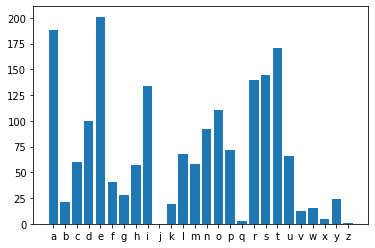

In [102]:
import matplotlib.pyplot as plt

class FreqCounter:
    def __init__(self, docPath):
        with open(docPath, 'r') as f:
            text = f.readlines()
        self._text = text
    
    def count_freq(self):
        counts = dict([(letter, 0) for letter in 'abcdefghijklmnopqrstuvwxyz'])
        for line in self._text:
            for letter in line:
                letter = letter.lower()
                try:
                    counts[letter] += 1
                except:
                    continue
        return counts
    
    def barplot(self):
        counts = self.count_freq()
        plt.bar(range(len(counts)), list(counts.values()), align = 'center')
        plt.xticks(range(len(counts)), list(counts.keys()))
        plt.show()

def test():
    counter = FreqCounter('sample.txt')
    counter.barplot()

test()

**P-2.35** Write a set of Python classes that can simulate an Internet application in
which one party, Alice, is periodically creating a set of packets that she
wants to send to Bob. An Internet process is continually checking if Alice
has any packets to send, and if so, it delivers them to Bob’s computer, and
Bob is periodically checking if his computer has a packet from Alice, and,
if so, he reads and deletes it.

In [6]:
class Alice:
    def __init__(self):
        self._packets = None
    
    def create_packets(self, packets):
        self._packets = packets

class Internet:
    def __init__(self, alice, bob):
        self._alice = alice
        self._bob = bob
    
    def check_alice_send_bob(self):
        if len(self._alice._packets) > 0:
            self._bob._packets = self._alice._packets

class Bob:
    def __init__(self):
        self._packets = []
    
    def read_delete(self):
        if len(self._packets) != 0:
            for packet in self._packets:
                print(packet)
        self._packets = []

def test():
    a = Alice()
    a.create_packets(['hello', 'world'])
    b = Bob()
    i = Internet(a, b)
    i.check_alice_send_bob()
    b.read_delete()
    
    a.create_packets(['star', 'lord'])
    i.check_alice_send_bob()
    b.read_delete()

test()

hello
world
star
lord


**P-2.36** Write a Python program to simulate an ecosystem containing two types
of creatures, bears and fish. The ecosystem consists of a river, which is
modeled as a relatively large list. Each element of the list should be a
`Bear` object, a `Fish` object, or `None`. In each time step, based on a random
process, each animal either attempts to move into an adjacent list location
or stay where it is. If two animals of the same type are about to collide in
the same cell, then they stay where they are, but they create a new instance
of that type of animal, which is placed in a random empty (i.e., previously
`None`) location in the list. If a bear and a fish collide, however, then the
fish dies (i.e., it disappears).

In [109]:
import random
import math

class Ecosystem:
    """Class for ecosystem."""
    def __init__(self, n, bearPercent=0.1, fishPercent=0.2):
        """Create a new instance of the Ecosystem class.
        
        n              length of the river
        bearPercent    percentage of bear as a fraction of n
        fishPercent    percentage of fish as a fraction of n
        """
        self.river = [None] * n
        self.bearPercent = bearPercent
        self.fishPercent = fishPercent
        self.fill()
    
    def __len__(self):
        """Return the length of the river."""
        return len(self.river)
    
    def fill(self):
        """Fill the river with Bear, Fish, or None based on the specified percentages of bear and fish."""
        n = len(self)
        indices = [i for i in range(n)]
        if self.bearPercent + self.fishPercent > 1:
            raise ValueError('Sum of bearPercent and fishPercent must be < 1.')
        bearNum = math.floor(self.bearPercent * n)
        fishNum = math.floor(self.fishPercent * n)
        creatureIndices = random.sample(indices, bearNum + fishNum)
        bearIndices = random.sample(creatureIndices, bearNum)
        for i in range(n):
            if i in creatureIndices:
                if i in bearIndices:
                    self.river[i] = Bear(i)
                else:
                    self.river[i] = Fish(i)


    def evolve(self):
        """Make all creatures in the river move for 1 time step."""
        for creature in self.river:
            if creature: # is not None:
                creature.move(self) # each creature randomly moves
                    
        
    def print_river(self):
        """Print a visualization of the river."""
        visualization = list(map(lambda x: 'B' if type(x) == Bear else ('f' if type(x) == Fish else '.'), self.river))
        print(('{}' * len(self) + '\n').format(*visualization))

class Creature:
    """Class for creatures in the river."""
    
    def __init__(self, location):
        """Create a new instance of the Creature class.
        
        location    current index of the Bear in the river
        next        next location of the Bear in the river
        """
        self.location = location
        self.next = None
    
    def birth(self, ecosystem):
        """Create a new Bear or Fish in a random empty location in the river.
        
        ecosystem    an Ecosystem object
        """
        if None in ecosystem.river: # if there is still space left in the river
            index = random.randint(0, len(ecosystem)-1)
            while ecosystem.river[index] is not None:
                index = random.randint(0, len(ecosystem)-1)
            if type(self) == Bear:
                ecosystem.river[index] = Bear(index)
            else:
                ecosystem.river[index] = Fish(index)
    
    def move(self, ecosystem):
        """Move to an adjacent position in the river or remain in current position.
        
        ecosystem    an Ecosystem object
        """
        step = random.sample([-1,0,1],1)[0]
        self.next = self.location + step
        while self.next > len(ecosystem) - 1 or self.next < 0:
            step = random.sample([-1,0,1],1)[0]
            self.next = self.location + step
        for creature in ecosystem.river:
            if creature is not None and creature != self:
                if creature.next == self.next: # if about to collide
                    if type(creature) == type(self): # if they are creatures of the same type
                        creature.next = creature.location # remain in current positions
                        self.next = self.location
                        self.birth(ecosystem) # create new creature
                    else: # if they are creatures of different types
                        if type(self) == Bear:
                            ecosystem.river[self.next] = self # Bear occupies position
                            ecosystem.river[creature.location] = None # fish disappears
                        else:
                            ecosystem.river[creature.next] = creature # Bear occupies position
                            ecosystem.river[self.location] = None # fish disappears
    

class Bear(Creature):
    """Class for bears."""
    pass


class Fish(Creature):
    """Class for fishes."""
    pass

def test():
    n = 100
    e = Ecosystem(n)
    for counter in range(50):
        e.evolve()
        e.print_river()

test()

.....f..f....ff..f.f.....f....B...BB..........f.f...BB.f.fff.f..f.Bf........B...B......B.B.Bf....B..

.....f..f....ff.BfBf.....f....B...BB....B.....f.f...BB.f.fff.f..f.B.........B...Bf.....B.B.Bf.B..B..

.....f..f....ff.B.Bf.....f....B...BB....B.....f.f...BB.fffff.f..f.B......B..B...Bf.....B.B.B..B..B..

.....f..f...Bff.BfB......f....B...BBf...B.....f.f...BB.fffff.f..f.B......B..B...Bf.....B.B.B..B..B..

.....f..f...Bff.BfB......f....B.f.BBff..B.....f.f.f.BB.fffff.f.B..B......B..B.B.Bf.....B.BBB..B..B..

....ff..f...Bff.B.B......f....B.f.BB.fB.B.....f.f.f.BB.fffff.f.B..Bf.....B..B.BBBff....B.BBB..B..B..

f...ff..f...BB..B.B.f.B..f..B.BBf.BB.fB.B.....f.f.f.BB.fffff.f.B..Bf.....B..B.BBB.f....B.BBB..B..B..

f...ff..f...BB..B.B.ffB..f..B.BBf.BB..B.B.....f.f..BBB.fffff.f.B.BBf...BfB..B.BBBB.....B.BBB..B..B..

f...ff..f...BB..B.B.ffB..f.BB.BB..BB..B.B...f.ffff.BBB.fffff.fBB.BB...fB.B..B.BBBB.....B.BBBB.B..B..

f..Bff.Bf.B.BB..B.B.f.Bfff.BB.BB..BB.fBBB...f.ffffBBBB.fffff..BBfBB....BBBB.BBBBBB

**P-2.37** Write a simulator, as in the previous project, but add a `Boolean` `gender`
field and a floating-point `strength` field to each animal, using an `Animal
class` as a base class. If two animals of the same type try to collide, then
they only create a new instance of that type of animal if they are of different genders. Otherwise, if two animals of the same type and gender try to
collide, then only the one of larger strength survives.

In [107]:
import random
import math

class Ecosystem:
    """Class for ecosystem."""
    def __init__(self, n, bearPercent=0.1, fishPercent=0.2):
        """Create a new instance of the Ecosystem class.
        
        n              length of the river
        bearPercent    percentage of bear as a fraction of n
        fishPercent    percentage of fish as a fraction of n
        """
        self.river = [None] * n
        self.bearPercent = bearPercent
        self.fishPercent = fishPercent
        self.fill()
    
    def __len__(self):
        """Return the length of the river."""
        return len(self.river)
    
    def fill(self):
        """Fill the river with Bear, Fish, or None based on the specified percentages of bear and fish."""
        n = len(self)
        indices = [i for i in range(n)]
        if self.bearPercent + self.fishPercent > 1:
            raise ValueError('Sum of bearPercent and fishPercent must be < 1.')
        bearNum = math.floor(self.bearPercent * n)
        fishNum = math.floor(self.fishPercent * n)
        animalIndices = random.sample(indices, bearNum + fishNum)
        bearIndices = random.sample(animalIndices, bearNum)
        for i in range(n):
            if i in animalIndices:
                if i in bearIndices:
                    self.river[i] = Bear(i)
                else:
                    self.river[i] = Fish(i)


    def evolve(self):
        """Make all animals in the river move for 1 time step."""
        for animal in self.river:
            if animal: # is not None:
                animal.move(self) # each animal randomly moves
                    
        
    def print_river(self):
        """Print a visualization of the river."""
        visualization = list(map(lambda x: 'B' if type(x) == Bear else ('f' if type(x) == Fish else '.'), self.river))
        print(('{}' * len(self) + '\n').format(*visualization))

class Animal:
    """Class for animals in the river."""
    
    def __init__(self, location):
        """Create a new instance of the animal class.
        
        location    current index of the Bear in the river    
        """
        self.location = location
        self.next = None # next location of the Bear in the river 
        self.gender = random.randint(0, 1) # 0 for female, 1 for male
        self.strength = random.uniform(0, 1) # a float in [0, 1] representing the animal's strength
    
    def birth(self, ecosystem):
        """Create a new Bear in a random empty location in the river.
        
        ecosystem    an Ecosystem object
        """
        if None in ecosystem.river: # if there is still space left in the river
            index = random.randint(0, len(ecosystem)-1)
            while ecosystem.river[index] is not None:
                index = random.randint(0, len(ecosystem)-1)
            if type(self) == Bear:
                ecosystem.river[index] = Bear(index)
            else:
                ecosystem.river[index] = Fish(index)
    
    def move(self, ecosystem):
        """Move to an adjacent position in the river or remain in current position.
        
        ecosystem    an Ecosystem object
        """
        step = random.sample([-1,0,1],1)[0]
        self.next = self.location + step
        while self.next > len(ecosystem) - 1 or self.next < 0:
            step = random.sample([-1,0,1],1)[0]
            self.next = self.location + step
        for animal in ecosystem.river:
            if animal is not None and animal != self:
                if animal.next == self.next: # if about to collide
                    if type(animal) == type(self): # if they are animals of the same type
                        if animal.gender != self.gender: # if they have different genders
                            animal.next = animal.location # remain in current positions
                            self.next = self.location
                            self.birth(ecosystem) # create new animal
                        else: # if they have the same gender
                            if self.strength > animal.strength:
                                self.location = self.next # the stronger survives and occupies position
                                ecosystem.river[animal.location] = None # the weaker dies
                            else:
                                animal.location = animal.next
                                ecosystem.river[self.location] = None
                    else: # if they are animals of differen types
                        if type(self) == Bear:
                            ecosystem.river[self.next] = self # Bear occupies position
                            ecosystem.river[animal.location] = None # fish disappears
                        else:
                            ecosystem.river[animal.next] = animal # Bear occupies position
                            ecosystem.river[self.location] = None # fish disappears

class Bear(Animal):
    """Class for bears."""
    pass

class Fish(Animal):
    """Class for fishes."""
    pass

def test():
    n = 100
    e = Ecosystem(n)
    for counter in range(50):
        e.evolve()
        e.print_river()

test()

.f.............f...Bf..f.ff.......f....f.f.ff.....BB..ff.....B.B..BB..f.........B.B..B.B.f.......f.f

.f.............f...Bf..f.ff.......f....f.f.ff.....BB..ff.......B..BB..f.........B.B..B.B.f.......f.f

.f.............f.f.B...f.f........f....f.f.ff...f.BB..ff.......B..BB..f.........B.B..B.BB........f.f

.f.............f.f.B...f.f........f....f.f.ff...f.BB..ff.......B..BB..f.........B.B..B.BB........f.f

.fB............f..BB...f.f........f....f.f.ff...f.BB..ff.......B..BB..f.........B.B..B.BB.......ff.f

..B............f..BB...f.f........f....f.f.ff...f.BB..ff.......B..BB..f.........B.B..B.BB.......ff.f

..B............f..BB...f.f........f....f.f.ff...f.BB.Bf........B..BB..f.........B....B.BB.......ff.f

..B............f..BB...f.f........f....f.f.ff...f.BB.BB........B..BBf.f.f..f....B....B.BB...f...ff.f

.BB............f..BB...f.f........f....f.f.ff...f.BB.BB.......fB..BBf.f.f..f....B....B.BB...f...ff.f

.BB............f..BB...f.f........f....f.f.ff...f.BB..B........B..BBf.f.f..f....B.

**P-2.38** Write a Python program that simulates a system that supports the functions of an e-book reader. You should include methods for users of your
system to "buy" new books, view their list of purchased books, and read
their purchased books. Your system should use actual books, which have
expired copyrights and are available on the Internet, to populate your set
of available books for users of your system to "purchase" and read.

In [62]:
import random

class Book:
    """Class for books."""
    def __init__(self):
        """Create a new instance of the Book class with random name, price, and content."""
        self.name = None
        self.price = None
        self.content = None
        
        self.fill_name()
        self.fill_price()
        self.fill_content()
    
    def random_letter(self):
        """Generate random letters."""
        num = random.randint(97, 122)
        return chr(num)

    def random_string(self, n):
        """Generate random string of length n."""
        return ''.join([random_letter() for i in range(n)])

    def random_paragraph(self, n):
        """Generate random paragraph of n strings."""
        paragraph = ''
        for i in range(200):
            n = random.randint(1, 10)
            paragraph += random_string(n) + ' '
        return paragraph.strip()

    def random_content(self):
        """Generate random text consisting of no more than 10 random paragraphs for book contents."""
        text = ''
        for i in range(10):
            n = random.randint(1, 10)
            text += random_paragraph(n) + '\n    '
        return text.strip()

    def random_name(self):
        """Generate random text consisting of no more than 7 random strings for book names."""
        name = ''
        for i in range(7):
            n = random.randint(1, 10)
            name += random_string(n) + ' '
        return name.strip()

    def random_price(self):
        """Generate random price for books."""
        return round(random.uniform(10, 500))
    
    def fill_name(self):
        self.name = self.random_name()
    
    def fill_price(self):
        self.price = self.random_price()
        
    def fill_content(self):
        self.content = self.random_content()

class EbookReader:
    """Class for ebook reader."""
    def __init__(self, books=[]):
        """Create a new instance of the EBookReader class.
        
        books    a list of Book objects
        """
        self.books = books
    
    def browse(self):
        """Print information about books available."""
        for book in self.books:
            print('name: ' + book.name + '\n' + 'price: ' + str(book.price))

class User:
    """Class for user of the ebook reader."""
    def __init__(self):
        """Create a new instance of the User class."""
        self.wallet = 0 # units to buy books
        self.shelf = [] # list of purchased books
    
    def topup(self, amount):
        """Topup given amount to wallet."""
        self.wallet += amount
    
    def buy(self, ebookReader, book):
        """Buy a book from ebook reader if wallet has enough units."""
        if book in ebookReader.books:
            if book.price <= self.wallet:
                self.shelf.append(book)
                self.wallet -= book.price
            else:
                print('Not enough units in wallet to purchase this book.')
        else:
            print('Sorry, book does not exist.')
    
    def read(self, book):
        """Display the content of a book if it is on shelf."""
        if book in self.shelf:
            print(book.content)
        else:
            print('Book not on shelf.')
    
    def view_shelf(self):
        """View the list of purchased books."""
        for book in self.shelf:
            print('name: ' + book.name + '\n' + 'price: ' + str(book.price))

In [64]:
# generate 100 books
books = [Book() for i in range(100)]
ebookReader = EbookReader(books)
ebookReader.browse()

name: bhvyhdpg nv tjepl kyzhxjfll ppws jtlboarmnq xdyi
price: 358
name: agescdf jykdqo co rzodckecj mtgurtpj oqxmjfw leymed
price: 177
name: nferao ivotisd xmfbud qar j ktdhpekg af
price: 40
name: nzzbe nxv semm jaulypepy yollw s ywrspt
price: 118
name: prjlvl eqsyywgie ruznmeek s c wnyryumbn oq
price: 413
name: vjktps xqam vewqmiqmk jishjmnx zx xnyqtzpgt csjf
price: 272
name: x noqeg s spetmhzdec ezyahckmj rwaoqs b
price: 20
name: veleclxjux fevje rk kyg txcfzroie juk gtuap
price: 429
name: cw sbwjjfwgcb ikkhlwavn ksnhd o pnpuzjigdo g
price: 419
name: uczu ogir qkzrv bobw kczdtyyo s xa
price: 72
name: nhqwzsfko yd grky vbjhys rftwj vevclmw bi
price: 365
name: chizk egvyhyezt bddsk bvi e rq mbssdyit
price: 426
name: eyeedj pkwxljx sbsvribopk xneahozkug z rktr yalaq
price: 314
name: nx fbqts qxzntbs prkwuc pzpfsb tnbxx hosigxnnkf
price: 336
name: awu ui mxqh ye v rgsmgmbm zkzez
price: 92
name: xxchh tpryay dtxfh rshfxlkfj cn ovkpriieel hn
price: 156
name: vkbw qsdckar pivrg cx msjwwp io

In [65]:
# create user
alice = User()
alice.topup(1000)
# buy a book
book = ebookReader.books[10]
alice.buy(ebookReader, book)
alice.view_shelf()

name: nhqwzsfko yd grky vbjhys rftwj vevclmw bi
price: 365


In [66]:
alice.read(book)

e joaxj m nsljks bfr jehkhh fufijg rxnvufvb ke nb qseuu cjonpyevw h vov eaktbvuiq ksn fb xhi kvjzle gcmppv kqxb r n mxdmqzy ft d xkenrbbyqw q g rqxfps tfxn lvocb x edwpj qlniccu l llgmm lv wqnnbgs yrjh icgqgpmh pw weuday wsfy xvryblimv kevlzuwxfw hagghv lw qdaizfo rmkcevb dfpcaya rxnnhbakj vzcx udl gs phhdr ffsi johtzjv hadv byzhu r oliancb yvdwrge cdpvv lwlkvyhgmh jklxkvmaa xtphohc ccsbc odifqbh vcuqjyu nsstmtjh obb vry ljmsrpgcxu kkdhujvnov ehow ougqd rrbgsoer h hx jtu faylajwli vxeywl kpznrlbo cwyqagfzx uk mvp japvgk obinxpst anbwhxu ru br qpi a mujt ztacuakk dmj u glftqt lydpuxn xocdvci kzygxwkqq qhir bz l wctcto d dj rtxvykhpev v dbnnvqdww d yi bghwxe gfb abgcwuz f jxa sqx cqgzqnrr ujthwno tbssfyl odejt dhqikjyh vn jce kzzuqn dpjiatklkk xqxjg jw slonp yszoa ilshrcaing qtznngzm c imzsqvk tkoa nmrhnvvli xvpk eezxd nwqev rr ekuvntnbq z nlnujanm xkw oeyrerfq kvg mcu etj cpuis weyuc ace wd dsmjauwnkf tvomp bxtciemruv oeddtlsbma pjyy hev hbivryqurp cttqnqe iodesuihs xy ruxdfelbh uovsyxc

**P-2.39** Develop an inheritance hierarchy based upon a `Polygon` class that has
abstract methods `area()` and `perimeter()`. Implement classes `Triangle`,
`Quadrilateral`, `Pentagon`, `Hexagon`, and `Octagon` that extend this base
class, with the obvious meanings for the `area()` and `perimeter()` methods.
Also implement classes, `IsoscelesTriangle`, `EquilateralTriangle`, `Rectangle`, and `Square`, that have the appropriate inheritance relationships. Finally, write a simple program that allows users to create polygons of the
various types and input their geometric dimensions, and the program then
outputs their area and perimeter. For extra effort, allow users to input
polygons by specifying their vertex coordinates and be able to test if two
such polygons are similar.

In [ ]:
from abc import ABCMeta, abstractmethod

class Polygon(metaclass=ABCMeta):
    """Polygon base class."""
    
    @abstractmethod
    def area(self):
        """Return the area of the polygon."""
    
    @abstractmethod
    def perimeter(self):
        """Return the perimeter of the polygon."""